In [35]:
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
df = pd.read_csv('alignment-forum-posts-and-authors.csv')

Number of posts and unique authors

In [51]:
num_posts = len(df['titles'])
print(f'Number of posts: {num_posts}')

Number of posts: 210


In [56]:
unique_authors = []

for authors_list in df['authors']:
    authors = authors_list.split(',')
    unique_authors.extend(authors)

print(f'Number of unique authors:', len(set(unique_authors)))

Number of unique authors: 151


Number of authors by post count

In [59]:
from collections import defaultdict
author_counts = defaultdict(int)

for authors_list in df['authors']:
    authors = authors_list.split(',')
    for author in authors:
        author_counts[author] += 1

# for k, v in sorted(author_counts.items(), key=lambda item: item[1], reverse=True):
#     print(f'{k}: {v}')

post_counts = defaultdict(int)

for author, count in author_counts.items():
    post_counts[count] += 1

print(post_counts)


defaultdict(<class 'int'>, {1: 96, 2: 25, 4: 8, 11: 1, 6: 2, 3: 16, 5: 2, 15: 1})


num_posts: [1, 2, 4, 11, 6, 3, 5, 15]
counts: [96, 25, 8, 1, 2, 16, 2, 1]


<BarContainer object of 8 artists>

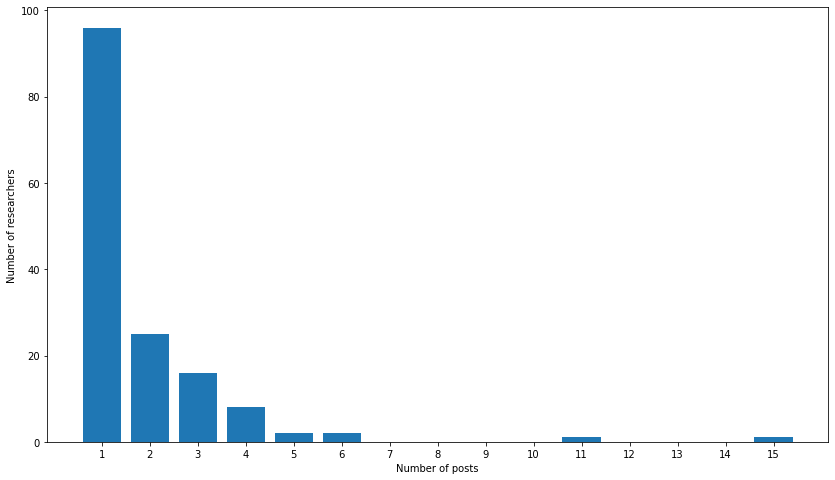

In [60]:
fig, ax = plt.subplots(figsize=(14, 8))

num_posts = list(post_counts.keys())
counts = list(post_counts.values())

print(f'num_posts: {num_posts}')
print(f'counts: {counts}')

xticks = [n for n in range(1, max(num_posts) + 1)]
ax.set_xticks(xticks)

ax.set_xlabel('Number of posts')
ax.set_ylabel('Number of researchers')

ax.bar(num_posts, counts)
